# Data Exploration

File loads in the .csv file for the australian horses data from kaggle and plots a few bits to see if there are any interesting insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# columns to read
col = ['position','position_again','position_two','margin','bf_odds','betfair_slope',
           'market_id','date','market_name', 'condition','weather','runner_id','barrier','dfs_form_rating',
           'tech_form_rating','handicap_weight','last_five_starts','prize_money',
           'sex','age','last_twenty_starts','field_strength','days_since_last_run', 'overall_starts']

# Specify dtypes to save memory when reading
data_types = {'position' : float,'position_again' : float,'position_two' : float,'margin' : float,
              'bf_odds' : float,'betfair_slope' : float, 'market_id' : float, 'date':str,'market_name':str, 
              'condition' : str,'weather' : str,'runner_id' : float,'barrier' : float,
              'dfs_form_rating' : float,'tech_form_rating' : float,'last_five_starts' : str,
              'prize_money' : float, 'sex' : str,'age' : float,'last_twenty_starts' : str,
              'field_strength' : float,'days_since_last_run' : float, 'handicap_weight' : float, 'overall_starts':float}


In [19]:
horses = pd.read_csv('input/horses.csv',sep = ',', usecols = col, 
                     index_col = 'market_id', dtype = data_types)

In [20]:
horses.head()

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,tech_form_rating,handicap_weight,last_five_starts,prize_money,sex,age,last_twenty_starts,field_strength,days_since_last_run,overall_starts
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,97.0,58.5,f3,2160.0,Gelding,3.0,f3,-1.5,14.0,1.0
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,82.0,58.5,x80x2,21175.0,Gelding,5.0,f0x6x80x2,-2.0,39.0,5.0
1.0,0.0,3.0,3.0,NaN,95.00,0.209409,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,62.0,56.5,79x00,28855.0,Mare,6.0,f68477579x00,-1.5,15.0,10.0
1.0,0.0,NaN,4.0,NaN,20.00,0.014119,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,71.0,56.5,f0,1475.0,Filly,3.0,f0,NaN,15.0,1.0
1.0,0.0,NaN,5.0,NaN,2.74,0.000521,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,91.0,56.5,f4x,1215.0,Filly,3.0,f4x,-3.5,173.0,1.0


In [21]:
horses.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 221680 entries, 1.0 to 34587.0
Data columns (total 23 columns):
position               221680 non-null float64
position_again         63219 non-null float64
position_two           217162 non-null float64
margin                 153742 non-null float64
bf_odds                221680 non-null float64
betfair_slope          221619 non-null float64
date                   221680 non-null object
market_name            221680 non-null object
condition              199492 non-null object
weather                199571 non-null object
runner_id              221680 non-null float64
barrier                195391 non-null float64
dfs_form_rating        195381 non-null float64
tech_form_rating       195391 non-null float64
handicap_weight        195391 non-null float64
last_five_starts       184731 non-null object
prize_money            194889 non-null float64
sex                    194889 non-null object
age                    194889 non-null float6

In [22]:
# get the months as a separate column...might be useful
horses['date'] = pd.to_datetime(horses['date'], format = '%Y-%m-%d')

horses['month'] = pd.DatetimeIndex(horses['date']).month

In [23]:
# The going
horses['condition'].unique()

array(['HVY9', 'HVY10', 'GOOD4', 'HVY8', 'AWT', 'SOFT6', 'SOFT5', 'SOFT7',
       'GOOD', 'GOOD3', nan, 'FIRM2', 'HEAVY'], dtype=object)

In [24]:
#weather
horses['weather'].unique()

array(['FINE', 'OCAST', 'SHWRY', nan], dtype=object)

In [25]:
#market_name
len(horses['market_name'].unique())

names = ['race_no','distance','race_type']
for i, name in enumerate(names):
    horses[name] = horses['market_name'].apply(lambda x : x.split()[i])

horses['distance'] = horses['distance'].str.slice(0,-1).astype('float32')

In [26]:
horses['race_type'].unique()

array(['Mdn', '2yo', '3yo', 'Hcap', 'CL1', 'CL2', 'CL3', 'CL5', 'WFA',
       'Listed', 'Grp3', 'Cup', 'Hrd', 'Stpl', 'Qlty', 'CL6', 'CL4',
       'Grp2', 'Qtly', 'Grp1', 'Hcp', '4yo'], dtype=object)

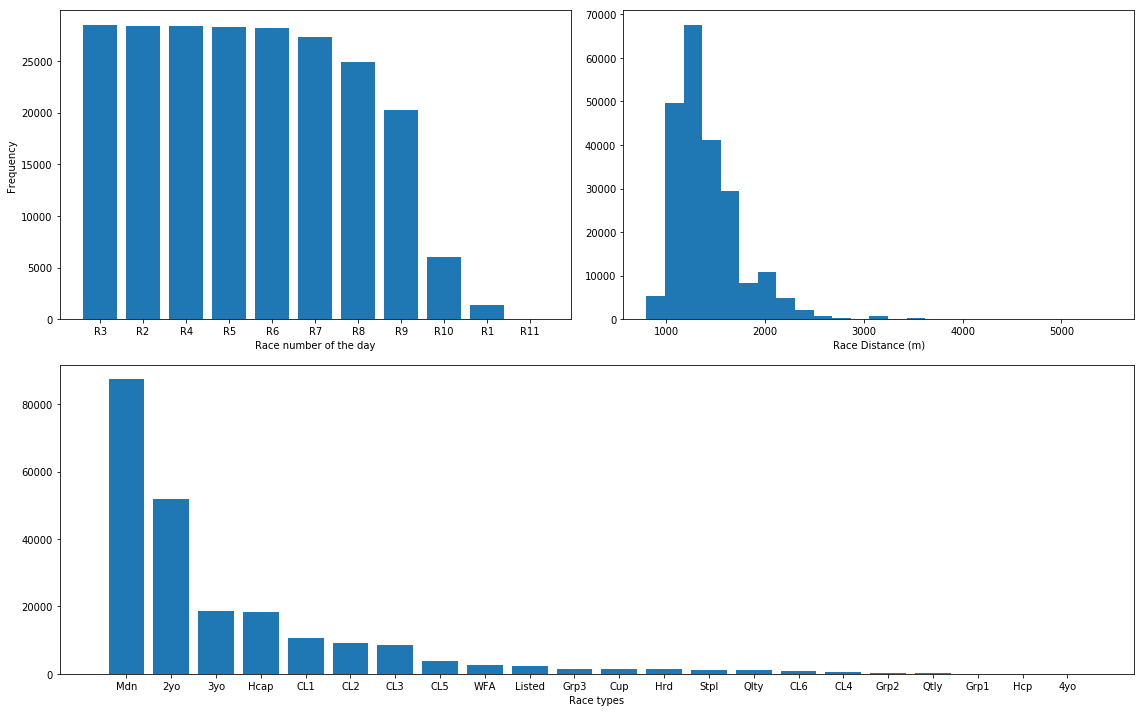

In [27]:
plt.figure(figsize = (16,10))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax1.bar(horses['race_no'].unique(), horses['race_no'].value_counts())
ax1.set_xlabel('Race number of the day')
ax1.set_ylabel('Frequency')
ax2.hist(horses['distance'],bins = 25)
ax2.set_xlabel('Race Distance (m)')
ax3.bar(horses['race_type'].unique(), horses['race_type'].value_counts())
ax3.set_xlabel('Race types')
plt.tight_layout()

Odd that there isn't much data on the very first race of the day.  Should look into this further

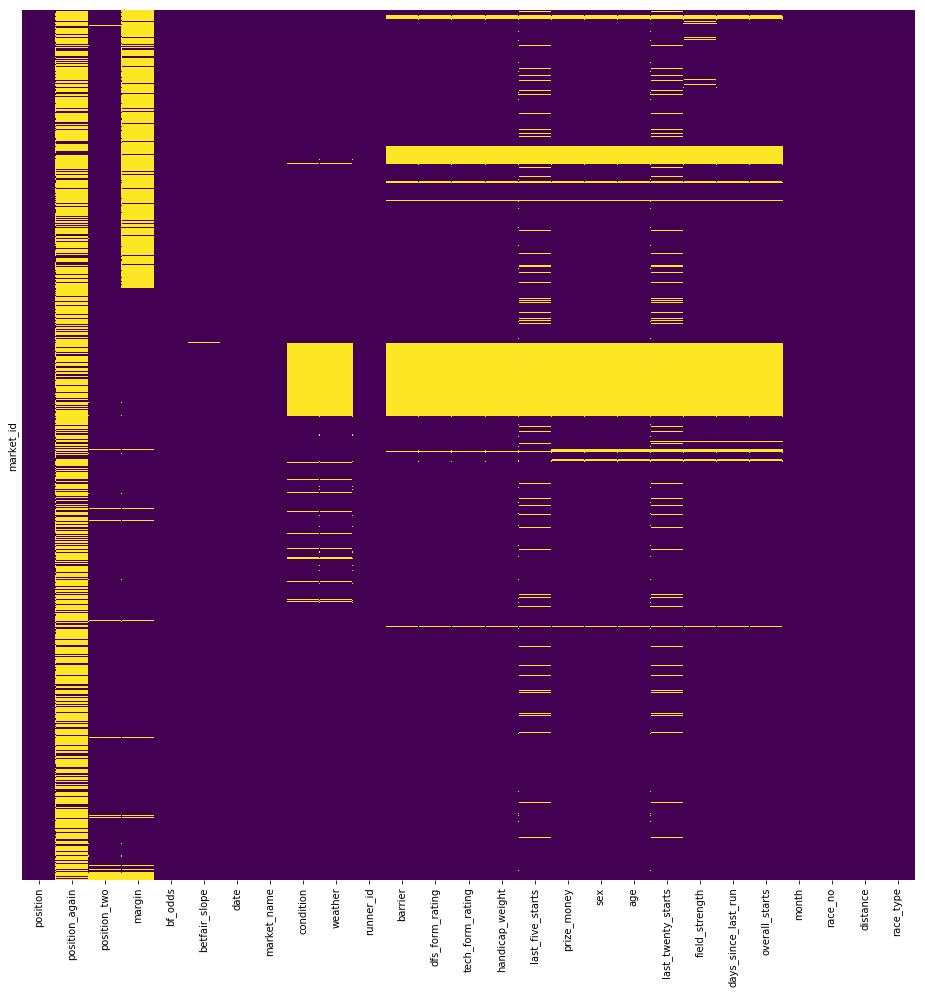

In [28]:
# Plot to see where the null values are
plt.figure(figsize = (16,16))
sns.heatmap(data = horses.isnull(), yticklabels = False, cbar = False,linewidths = 0, cmap = 'viridis')


Yellow = Missing Data <br>
comments: <br>
position_again -  data entered is just those horses which places so can fill in the rest with 0<br>
position_two - exact position - shouldn't be any missing - amount missing is minimal<br>
margin - 30 % of dataset missing - this is a bit annoying as would potentially be a good feature<br>
some entries just don't have much data on them so I'll drop them.<br>

THIS IS GENERALLY REPRESENTATIVE OF THE WHOLE DATASET, I'VE JUST LOADED A SUBSET DUE TO MEMORY ISSUES

In [29]:
# # code for comparing whether data is missing for an entire race or just a couple of runners.
x_over = list(set(horses[horses['barrier'].isnull()].index) & 
              set(horses.dropna(subset = ['barrier']).index) )# market ids which have runners 
                                                                #with and without barrier data
print('Number of races with a runner missing barrier data: ' + str(len(x_over)))
print('Total number of horses in races where some horses don''t have barrier info: ' +
      str(horses.loc[x_over].shape[0]))
print('Percentage of runners in those races which have barrier data:{:10.2f}%'
      .format(horses.dropna(subset = ['barrier']).loc[x_over].shape[0]/ horses.loc[x_over].shape[0] *100))



Number of races with a runner missing barrier data: 45
Total number of horses in races where some horses dont have barrier info: 453
Percentage of runners in those races which have barrier data:     74.61%


In [30]:
# Decided to drop all missing data and have partial data for a race.  
# Think this is valid, but depends on if any of those with missing data, won/placed
horses.dropna(subset = ['barrier'], inplace = True)


In [31]:
number_of_races = len(horses.index.unique())

In [32]:
# position_again = horses which placed
horses['position_again'].fillna(value = 0, inplace = True)

In [50]:
# Number of horses missing form data
print('missing last five starts form: ' + str(horses[(horses['last_five_starts'].isnull())]['runner_id'].count()))
print('missing last twenty starts form: ' + str(horses[(horses['last_twenty_starts'].isnull())]['runner_id'].count()))

missing last five starts form: 10660
missing last twenty starts form: 11355


In [53]:
# number of horses missing form data who have raced before
print('missing last five starts form but have raced before: ' + 
      str(horses[(horses['last_five_starts'].isnull()) & \
                 (horses['overall_starts'] != 0.0)]['runner_id'].count()))
print('missing last twenty starts form but have raced before: ' + 
      str(horses[(horses['last_twenty_starts'].isnull()) & \
                 (horses['overall_starts'] != 0.0)]['runner_id'].count()))

missing last five starts form but have raced before: 61
missing last twenty starts form but have raced before: 756


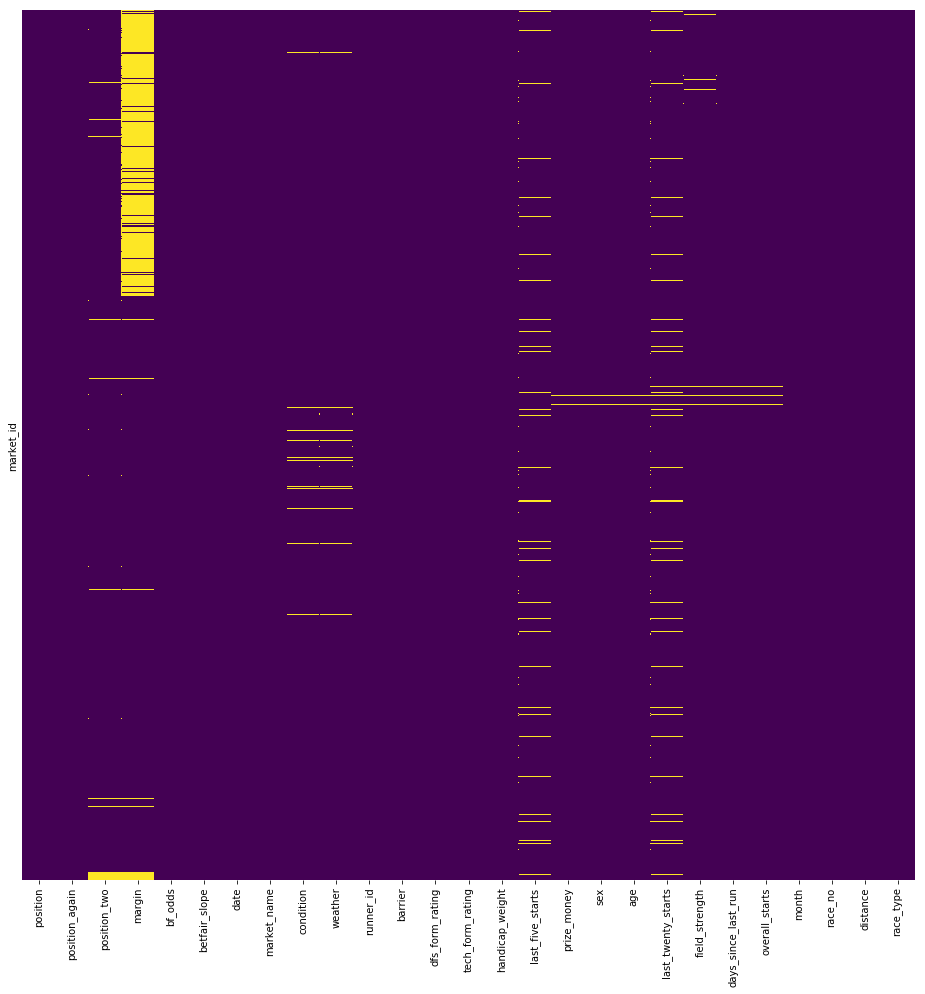

In [34]:
# Plot to see where the null values are now
plt.figure(figsize = (16,16))
sns.heatmap(data = horses.isnull(), yticklabels = False, cbar = False,linewidths = 0, cmap = 'viridis')

### That's tidy enough for now.  Lets plot some graphs 

In [59]:
sns.set_style('darkgrid')

In [60]:
horses.head(2)

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,sex,age,last_twenty_starts,field_strength,days_since_last_run,overall_starts,month,race_no,distance,race_type
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,Gelding,3.0,f3,-1.5,14.0,1.0,6,R3,1200.0,Mdn
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,Gelding,5.0,f0x6x80x2,-2.0,39.0,5.0,6,R3,1200.0,Mdn


### Handicap_weight 

In [61]:
win_per_handicap = horses[(horses['position'] == 1.0)].groupby('handicap_weight').count()['position'] 
horse_per_handicap = horses.groupby('handicap_weight').count()['position']
percent_win_per_handicap = win_per_handicap / horse_per_handicap
percent_win_per_handicap.fillna(0, inplace = True)

Text(0, 0.5, 'Frequency')

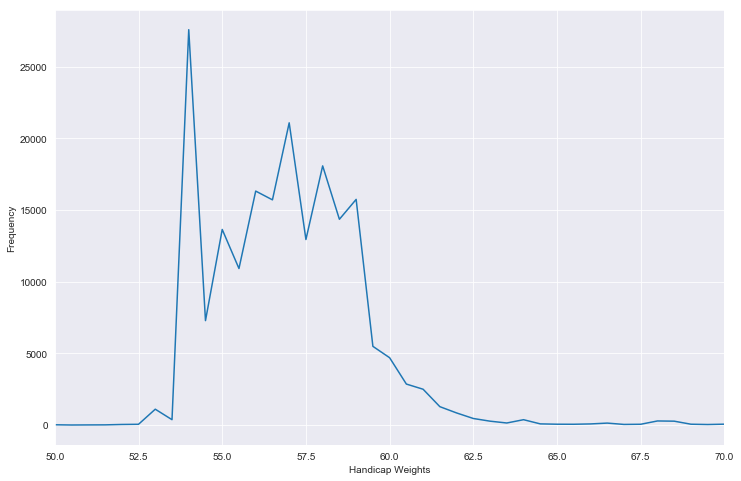

In [62]:
plt.figure(figsize = (12,8))
plt.plot(horse_per_handicap.index, horse_per_handicap)
plt.xlim([50,70])
plt.xlabel('Handicap Weights')
plt.ylabel('Frequency')

Majority of the horses sit between 52.5 and 62.5 kg

Text(0, 0.5, 'Percentage in weight class which won their race')

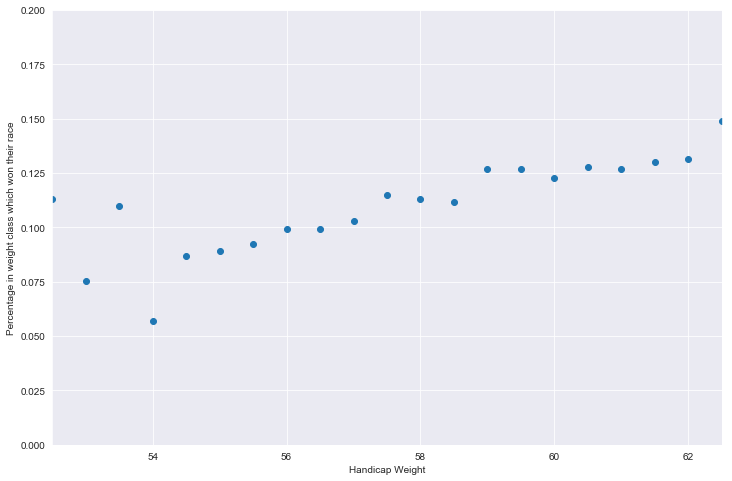

In [68]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.scatter(percent_win_per_handicap.index, percent_win_per_handicap)
ax1.set_xlim(52.5,62.5)
ax1.set_ylim(0,0.2)
ax1.set_xlabel('Handicap Weight')
ax1.set_ylabel('Percentage in weight class which won their race')

There is a trend.  It seems the heavier the horses the more likely to win

### Barriers 

In [64]:
win_per_barrier = horses[(horses['position'] == 1.0)].groupby('barrier').count()['position'] 
horse_per_barrier = horses.groupby('barrier').count()['position']
percent_win_per_barrier = win_per_barrier / horse_per_barrier
percent_win_per_barrier.fillna(0, inplace = True)

Text(0, 0.5, 'Frequency')

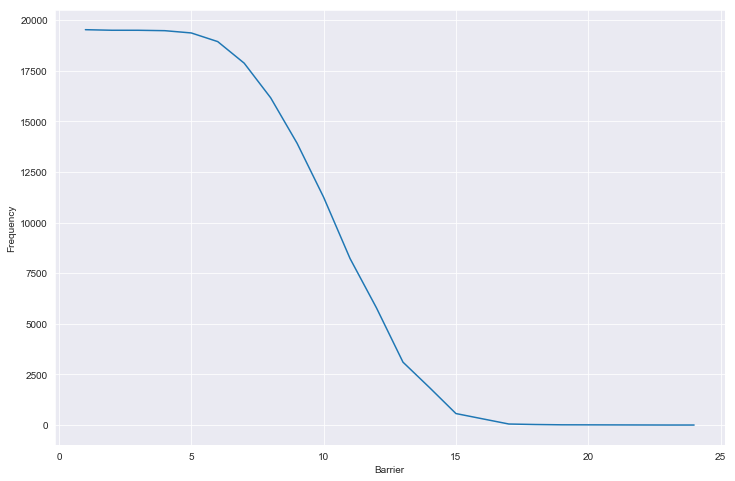

In [65]:
plt.figure(figsize = (12,8))
plt.plot(horse_per_barrier.index, horse_per_barrier)

plt.xlabel('Barrier')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage who started in that barrier which won their race')

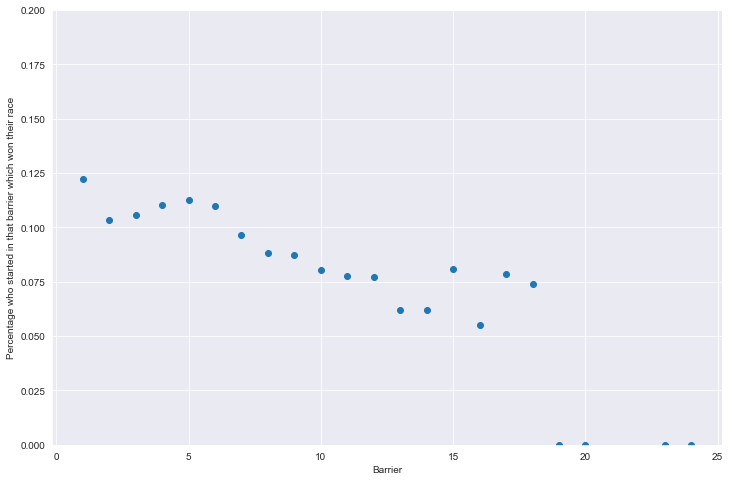

In [69]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.scatter(percent_win_per_barrier.index, percent_win_per_barrier)
ax1.set_ylim(0,0.2)
ax1.set_xlabel('Barrier')
ax1.set_ylabel('Percentage who started in that barrier which won their race')

As you might expect if you start on the inside you are more likely to win.  As you have less distance to go